#Stock Market Prediction

- Group Number 9

1) Pratik Rughe

2) Chinmaya Attarde

3) Mehbub 

4) Sandesh Kale

In [1]:
pip install mplfinance

     |████████████████████████████████| 71kB 4.1MB/s 


In [2]:
pip install --upgrade mpl-finance

In [3]:
import pandas as pd
import numpy as np
import datetime as dt                         
import pandas_datareader as web                 
import matplotlib.pyplot as plt                  
import matplotlib.dates as mdates              
from mpl_finance import candlestick_ohlc  
import seaborn as sns
from numpy.random import randn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#Starting date and ending date
ticker = 'AAPL'
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

In [5]:
#ticker ='Share'
ticker = 'AAPL'
data = web.DataReader(ticker,'yahoo',start,end)
print(data)
print(data.columns)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2019-01-02   39.712502   38.557499  ...  148158800.0   38.505024
2019-01-03   36.430000   35.500000  ...  365248800.0   34.669640
2019-01-04   37.137501   35.950001  ...  234428400.0   36.149662
2019-01-07   37.207500   36.474998  ...  219111200.0   36.069202
2019-01-08   37.955002   37.130001  ...  164101200.0   36.756794
...                ...         ...  ...          ...         ...
2021-04-08  130.389999  128.520004  ...   88844600.0  130.360001
2021-04-09  133.039993  129.470001  ...  106513800.0  133.000000
2021-04-12  132.850006  130.630005  ...   91420000.0  131.240005
2021-04-13  134.660004  131.929993  ...   91095100.0  134.429993
2021-04-14  135.000000  132.570007  ...   44569897.0  133.585007

[575 rows x 6 columns]
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [6]:
#Restructure the Data
data = data[['Open','High','Low','Close']]

#Why to Restructure the Data ???

In [7]:
#Resetting the index
data.reset_index(inplace=True)
data['Date'] =data['Date'].map(mdates.date2num)
print(data)

         Date        Open        High         Low       Close
0    737061.0   38.722500   39.712502   38.557499   39.480000
1    737062.0   35.994999   36.430000   35.500000   35.547501
2    737063.0   36.132500   37.137501   35.950001   37.064999
3    737066.0   37.174999   37.207500   36.474998   36.982498
4    737067.0   37.389999   37.955002   37.130001   37.687500
..        ...         ...         ...         ...         ...
570  737888.0  128.949997  130.389999  128.520004  130.360001
571  737889.0  129.800003  133.039993  129.470001  133.000000
572  737892.0  132.520004  132.850006  130.630005  131.240005
573  737893.0  132.440002  134.660004  131.929993  134.429993
574  737894.0  134.940002  135.000000  132.570007  133.585007

[575 rows x 5 columns]


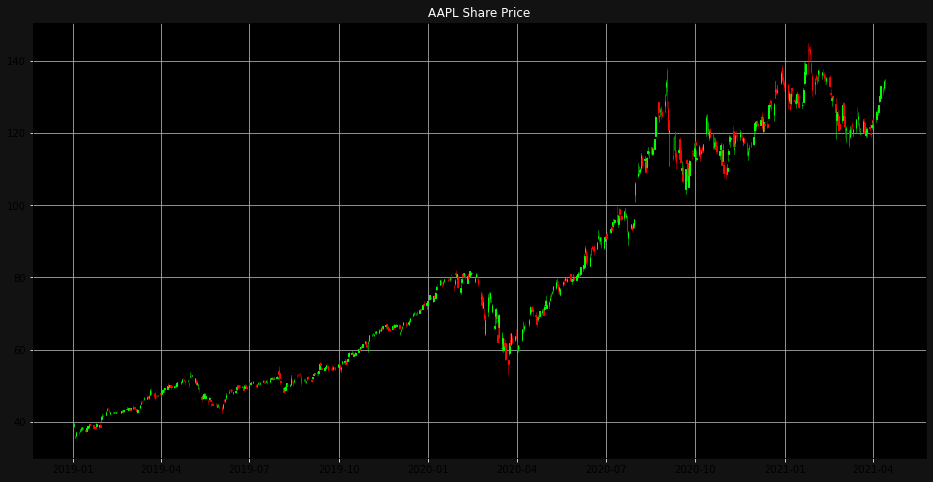

In [8]:
#Plotting the data
#Visualization
plt.figure(figsize=(16,8))
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title('{} Share Price'.format(ticker),color = 'white')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis = 'x', color = 'white')
ax.tick_params(axis = 'y', color = 'white')
ax.xaxis_date() #Axis with the real dates
candlestick_ohlc(ax,data.values,width=0.5,colorup='#00ff00')
plt.show()

In [9]:
#Taking Multiple Stocks like its very obvious to have multiple stocks 


In [13]:
# #ticker ='Share'
# ticker = 'AAPL'
# for ticker in tickers:
#     df = web.DataReader(ticker,'yahoo',dt.datetime(2019,8,1),dt.datetime.now())
#     price = df[-1:]['Close'][0]
#     prices.append(price)
#     index = prices.index(price)
#     total.append(price * amounts[index])

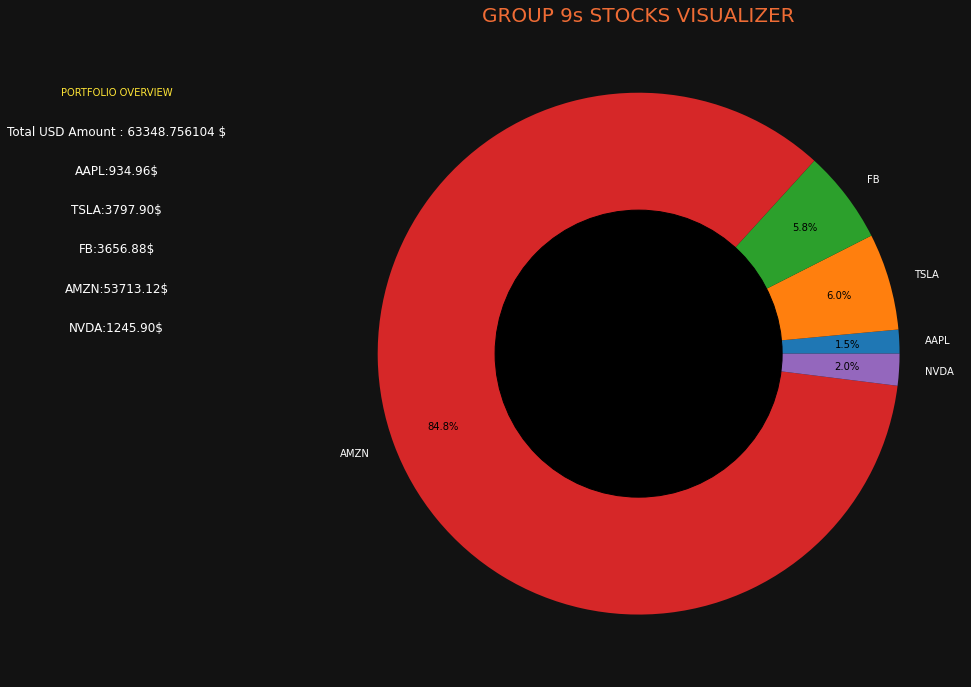

In [16]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

tickers = ['AAPL','TSLA','FB','AMZN','NVDA']
amounts = [7,5,12,16,2,4]
prices = []
total = []

# someboolean = True
# while(someboolean):
#     tickers = input("What stock do you want to add ?")
#     amount = input("What is the amount")

for ticker in tickers:
    df = web.DataReader(ticker,'yahoo',dt.datetime(2019,8,1),dt.datetime.now())
    price = df[-1:]['Close'][0]
    prices.append(price)
    index = prices.index(price)
    total.append(price * amounts[index])

# print(prices)
# print(total)

fig, ax = plt.subplots(figsize=(16,12))

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')

ax.tick_params(axis='x',color='white')
ax.tick_params(axis='y',color='white')

ax.set_title('GROUP 9s STOCKS VISUALIZER',color='#EF6C35',fontname='Times New Roman',fontsize=20)
_, texts, _ = ax.pie(total,labels=tickers, autopct="%1.1f%%", pctdistance=0.8)
[text.set_color('white') for text in texts]

my_circle=plt.Circle((0,0),0.55,color='black')
plt.gca().add_artist(my_circle)

ax.text(-2,1,'PORTFOLIO OVERVIEW',fontname='Times New Roman',color='#FFE536',verticalalignment='center',horizontalalignment='center')
ax.text(-2,0.85,f'Total USD Amount : {sum(total):2f} $',fontsize=12,color='white',verticalalignment='center',horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2,0.85 - counter, f'{ticker}:{total[tickers.index(ticker)]:.2f}$', fontsize= 12,color = 'white',verticalalignment='center',horizontalalignment='center')
    counter += 0.15

plt.show()

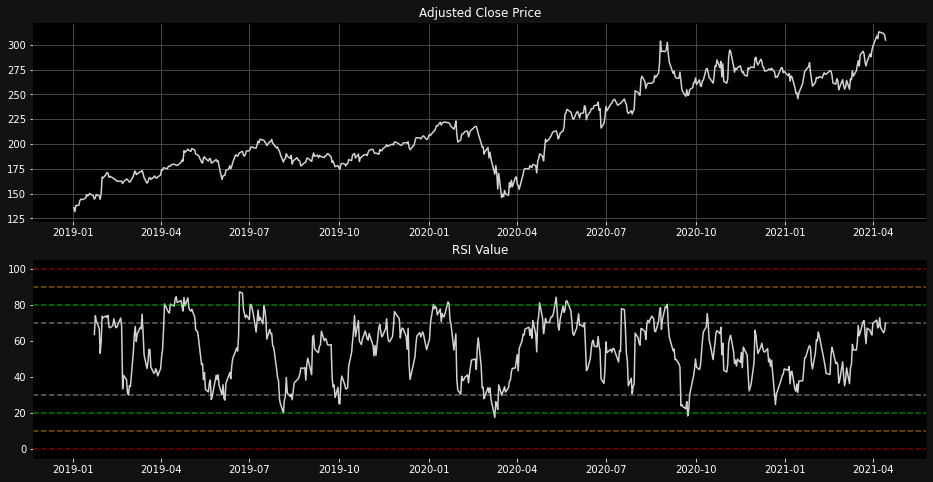

In [18]:
import pandas as pd
ticker = 'FB'
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

data = web.DataReader(ticker,'yahoo',start,end)
delta = data['Adj Close'].diff(1)
delta.dropna(inplace=True)

positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

days = 14

average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean())

relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0/ (1.0 + relative_strength))

combined = pd.DataFrame()
combined ['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

plt.figure(figsize=(16,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color = 'lightgray')
ax1.set_title('Adjusted Close Price',color = 'white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(combined.index, combined['RSI'], color = 'lightgray')

#RSI value 30 is oversold and 70 is overbuied

ax2.axhline(0, linestyle='--',alpha=0.5, color='#ff0000')
ax2.axhline(10, linestyle='--',alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle='--',alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle='--',alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle='--',alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle='--',alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle='--',alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle='--',alpha=0.5, color='#ff0000')


ax2.set_title("RSI Value",color = 'white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
plt.show()

In [19]:
df = web.DataReader(ticker,'yahoo',start,end)
print(df.head(5))

                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2019-01-02  137.509995  128.559998  ...  28146200  135.679993
2019-01-03  137.169998  131.119995  ...  22717900  131.740005
2019-01-04  138.000000  133.750000  ...  29002100  137.949997
2019-01-07  138.869995  135.910004  ...  20089300  138.050003
2019-01-08  143.139999  139.539993  ...  26263800  142.529999

[5 rows x 6 columns]


In [20]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [21]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-08,315.880005,310.049988,314.850006,313.019989,20894100,313.019989
2021-04-09,314.739990,310.329987,311.399994,312.459991,15983000,312.459991
2021-04-12,312.149994,307.929993,311.049988,311.540009,10881900,311.540009
2021-04-13,314.429993,309.320007,312.209991,309.760010,14018600,309.760010
2021-04-14,308.029999,302.940002,307.299988,304.827606,9302186,304.827606


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 575 entries, 2019-01-02 to 2021-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       575 non-null    float64
 1   Low        575 non-null    float64
 2   Open       575 non-null    float64
 3   Close      575 non-null    float64
 4   Volume     575 non-null    int64  
 5   Adj Close  575 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 31.4 KB


In [23]:
corr_matrics=df.corr()
corr_matrics

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.997744,0.998299,0.998124,0.108673,0.998124
Low,0.997744,1.000000,0.998173,0.998347,0.061094,0.998347
Open,0.998299,0.998173,1.000000,0.996365,0.082624,0.996365
Close,0.998124,0.998347,0.996365,1.000000,0.084901,1.000000
Volume,0.108673,0.061094,0.082624,0.084901,1.000000,0.084901
Adj Close,0.998124,0.998347,0.996365,1.000000,0.084901,1.000000


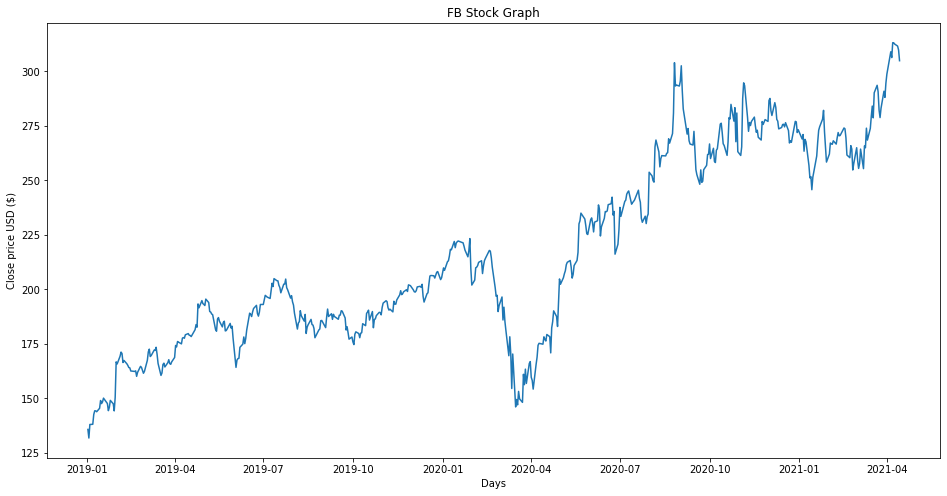

In [24]:
#Visualizing the close price data
plt.figure(figsize=(16,8))
plt.title(ticker +' Stock Graph')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.show()

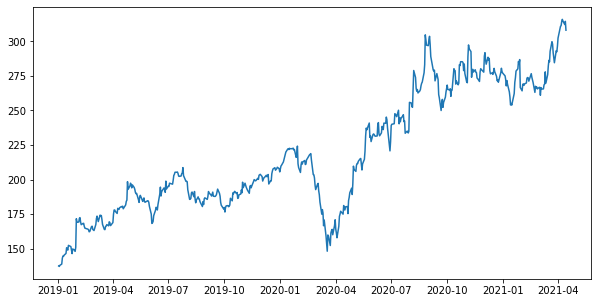

In [25]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["High"],label = "Og")

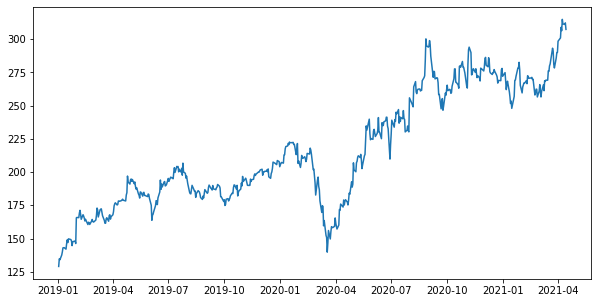

In [26]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Open"],label = "Og")

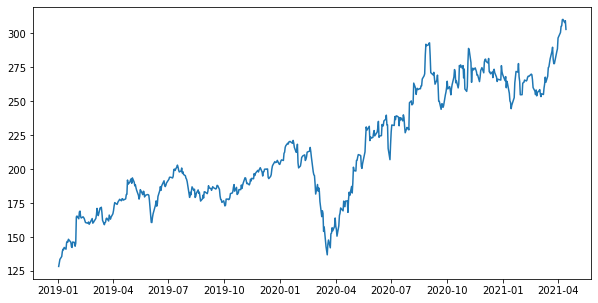

In [27]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Low"],label = "Og")


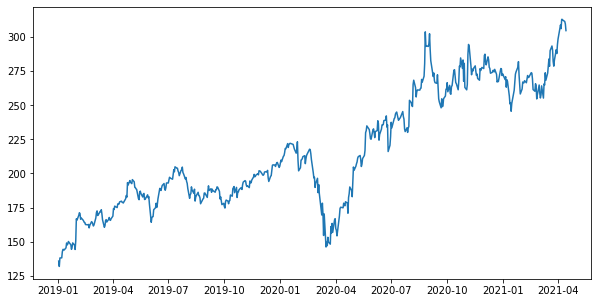

In [28]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Close"],label = "Og")

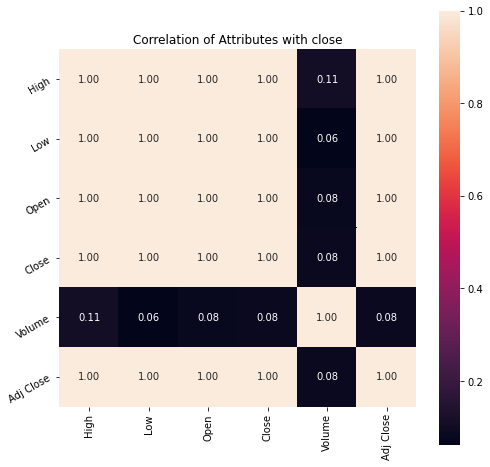

In [29]:
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Correlation of Attributes with close')
a = sns.heatmap(corr_matrics, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [30]:
df.head(15)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
2019-01-09,144.699997,141.270004,142.949997,144.229996,22205900,144.229996
2019-01-10,144.559998,140.839996,143.080002,144.199997,16125000,144.199997
2019-01-11,145.360001,142.570007,143.149994,143.800003,12908000,143.800003
2019-01-14,146.570007,141.270004,142.000000,145.389999,20520300,145.389999


#Defining the X and Y attributes

In [31]:
#Predicting Y as close values
x = df[['High','Low','Open','Volume']].values
y = df['Close'].values

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=0)

#Linear Regression

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(regressor.coef_)

[ 6.95193987e-01  7.96572977e-01 -4.93492120e-01  7.13599435e-09]


In [36]:
print(regressor.intercept_)

0.5155113307769739


In [37]:
predicted = regressor.predict(x_test)

In [38]:
print(predicted)

[273.75106217 185.06453255 274.65543005 265.2586447  270.1833801
 204.39705653 282.51572571 201.15054905 257.39534226 203.04346995
 272.43559365 205.07247009 191.41320627 232.76019239 188.77832664
 183.6623806  276.69589866 275.30963373 197.03402964 250.94747413
 293.57080762 267.32930231 264.42655631 274.22638185 189.71238851
 221.07819428 165.56108964 203.3300002  270.53125375 183.04189977
 207.42278252 227.09859492 162.07694176 213.57685813 144.88651795
 180.50573803 229.43711518 134.01557404 170.61248831 261.13747373
 235.7479447  214.92625932 274.76547192 227.29711292 190.31671558
 224.08212123 263.28323188 189.05500738 185.7547543  251.80825885
 148.24582024 203.45346688 235.55006807 271.9713003  204.839418
 168.73491645 286.23212303 212.65520595 177.34537067 194.41598363
 144.61814293 151.13582589 269.35583547 177.32054188 271.40597332
 294.15636073 180.93111465 178.28859799 207.45558454 273.35063424
 187.54777864 262.96781043 187.69674734 157.81270384 174.89627894
 232.77618612

In [39]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted.flatten()})

In [40]:
df.head(25)

,Actual,Predicted
0,271.390015,273.751062
1,184.820007,185.064533
2,276.920013,274.655430
3,266.609985,265.258645
4,272.790009,270.183380
5,206.809998,204.397057
6,281.850006,282.515726
7,201.050003,201.150549
8,255.309998,257.395342
9,201.639999,203.043470


In [41]:
print("Value of R square: ", regressor.score(x,y))

Value of R square:  0.9982370130508539


In [42]:
import math
import sklearn.metrics as metrics

In [43]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 1.4407858141298548
Mean Squared Error: 3.9279873059833044
Root Mean Squared Error: 1.9819150602342432


In [44]:
graph = df.head(50)

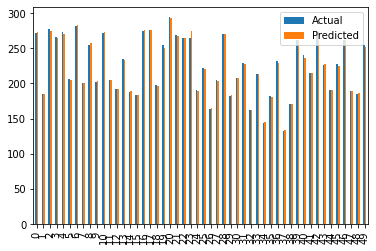

In [45]:
graph.plot(kind='bar')

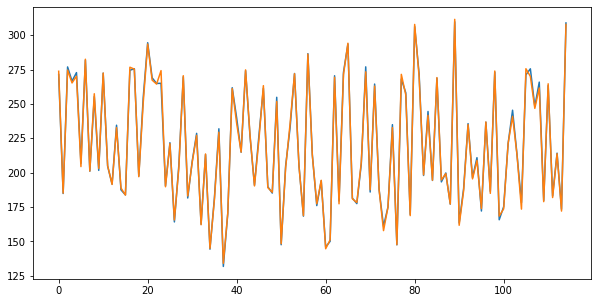

In [46]:
fig = plt.figure(figsize = (10,5))
plt.plot(df["Actual"], label= "Actual")
plt.plot(df["Predicted"], label = "Predicted")

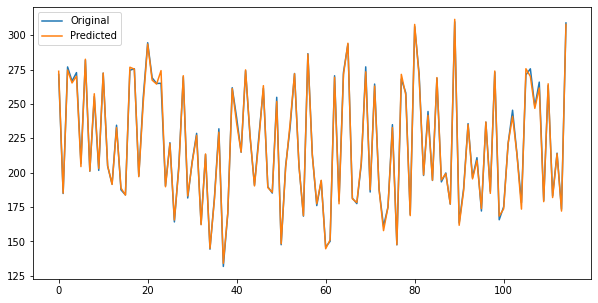

In [47]:
df= df.head(150)
fig = plt.figure(figsize = (10,5))
plt.plot(df["Actual"],label = "Original")
plt.plot(df["Predicted"],label = "Predicted")
plt.legend()

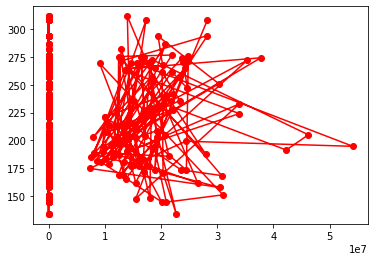

In [48]:
plt.plot(x_test,predicted ,color = "r",marker = "o")
# blue : actual value
# red : predicted value